## PSD Optimizer ##



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize as op
import sys
sys.path.append("C:/python/pyLife/pylife/stress")
from pylife.stress import psd_optimizer as psd_opt
import ipywidgets as wd

In [2]:
psd = pd.read_csv("PSD_values.csv",index_col = 0).iloc[5:1500,0]

<IPython.core.display.Javascript object>


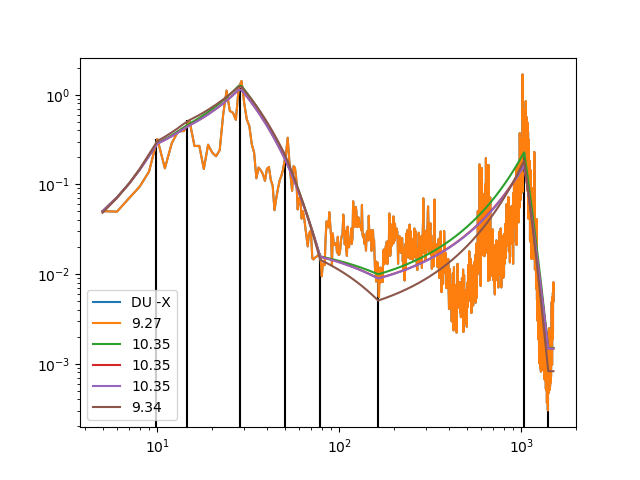

Textarea(value='', description='fsel = ', placeholder='')

In [3]:
#fsel = np.array([30,50,80,460,605,1000])
fsel = []
%matplotlib notebook
fig = plt.figure()
plt.loglog(psd.index.values,psd)
txt = wd.Textarea(
    value='',
    placeholder='',
    description='fsel = ',
    disabled=False
)
display(txt)
def onclick(event):
    yval = psd.values[psd.index.get_loc(event.xdata,method ='nearest')]
    plt.vlines(event.xdata,0,yval)
    fsel.append(event.xdata)
    txt.value = "{:.2f}".format(event.xdata)
cid = fig.canvas.mpl_connect('button_press_event', onclick) 

In [4]:
fsel = np.asarray(fsel)
print(fsel)

[   9.8495936    14.57808526   28.4988985    50.35143777   78.39095298
  163.25195829 1034.74303439 1401.72839955]


In [5]:
def rms_psd(psd):
    return (sum((np.diff(psd)+psd[:-1])*np.diff(psd.index.values))**0.5)
plt.loglog(psd.index.values,psd,label = "{:.2f}".format(rms_psd(psd)))
rms = []
for ii in np.linspace(0,1,4):
    psd_fit = psd_opt.psd_optimizer(psd,fsel,ii)
    rms.append(rms_psd(psd_fit))
    plt.loglog(psd.index.values,psd_fit,label = "{:.2f}".format(rms[int(ii)]))
plt.legend()

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 154
         Function evaluations: 241


f
5       0.050290
6       0.071810
7       0.102540
8       0.146419
9       0.209075
          ...   
1495    0.001504
1496    0.001504
1497    0.001504
1498    0.001504
1499    0.001504
Length: 1495, dtype: float64

Optimization terminated successfully.
         Current function value: 0.000962
         Iterations: 779
         Function evaluations: 1132


f
5       0.050188
6       0.071563
7       0.102043
8       0.145504
9       0.207476
          ...   
1495    0.001474
1496    0.001474
1497    0.001474
1498    0.001474
1499    0.001474
Length: 1495, dtype: float64

Optimization terminated successfully.
         Current function value: 0.000505
         Iterations: 507
         Function evaluations: 742


f
5       0.050112
6       0.071457
7       0.101895
8       0.145298
9       0.207188
          ...   
1495    0.001472
1496    0.001472
1497    0.001472
1498    0.001472
1499    0.001472
Length: 1495, dtype: float64

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 133
         Function evaluations: 249


f
5       0.048325
6       0.070360
7       0.102442
8       0.149154
9       0.217164
          ...   
1495    0.000825
1496    0.000825
1497    0.000825
1498    0.000825
1499    0.000825
Length: 1495, dtype: float64